### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("day.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Drop Casual and registered as we have the CNT variable as a target variable

df.drop(['casual','registered'], axis = 1, inplace = True)

In [5]:
# Now let us refer to the data dictionary and map the values to the 
# categorical variable before creating the visualization

In [6]:
# Define the data dictionary for each categorical column
season_dict = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
yr_dict = {0: 2018, 1: 2019}
mnth_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
weekday_dict = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
weathersit_dict = {1: 'Clear', 2: 'Mist + Cloudy', 3: 'Light Snow', 4: 'Heavy Rain'}

# Use the map function to replace the values in the DataFrame
df['season'] = df['season'].map(season_dict)
df['yr'] = df['yr'].map(yr_dict)
df['mnth'] = df['mnth'].map(mnth_dict)
df['weekday'] = df['weekday'].map(weekday_dict)
df['weathersit'] = df['weathersit'].map(weathersit_dict)


In [7]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,spring,2018,January,0,Saturday,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,spring,2018,January,0,Sunday,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,spring,2018,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,spring,2018,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,spring,2018,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 80.0+ KB


In [9]:
df.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2018.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,210.877136,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,2018.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,183.250000,2018.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,365.500000,2018.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,547.750000,2019.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,730.000000,2019.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

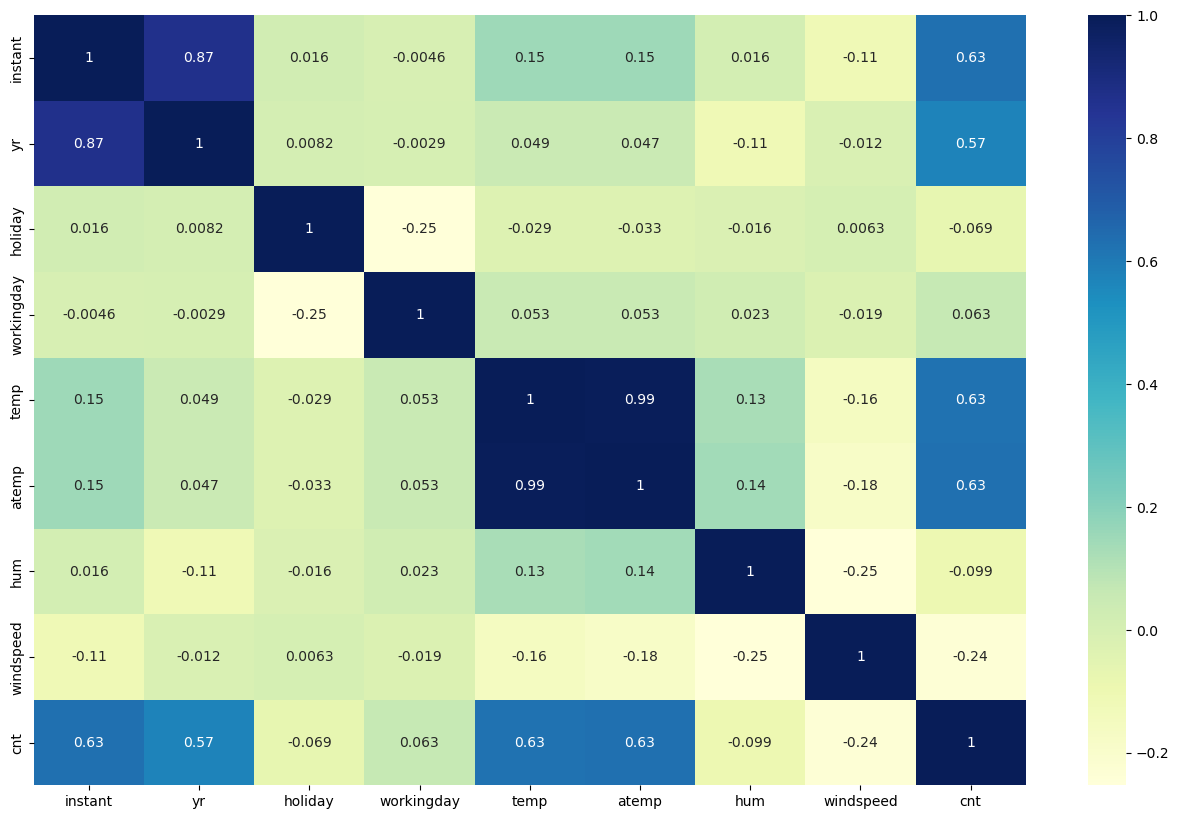

In [16]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [17]:
# We can notice the target variable CNT have positive correlation against Instant, temp, atemp

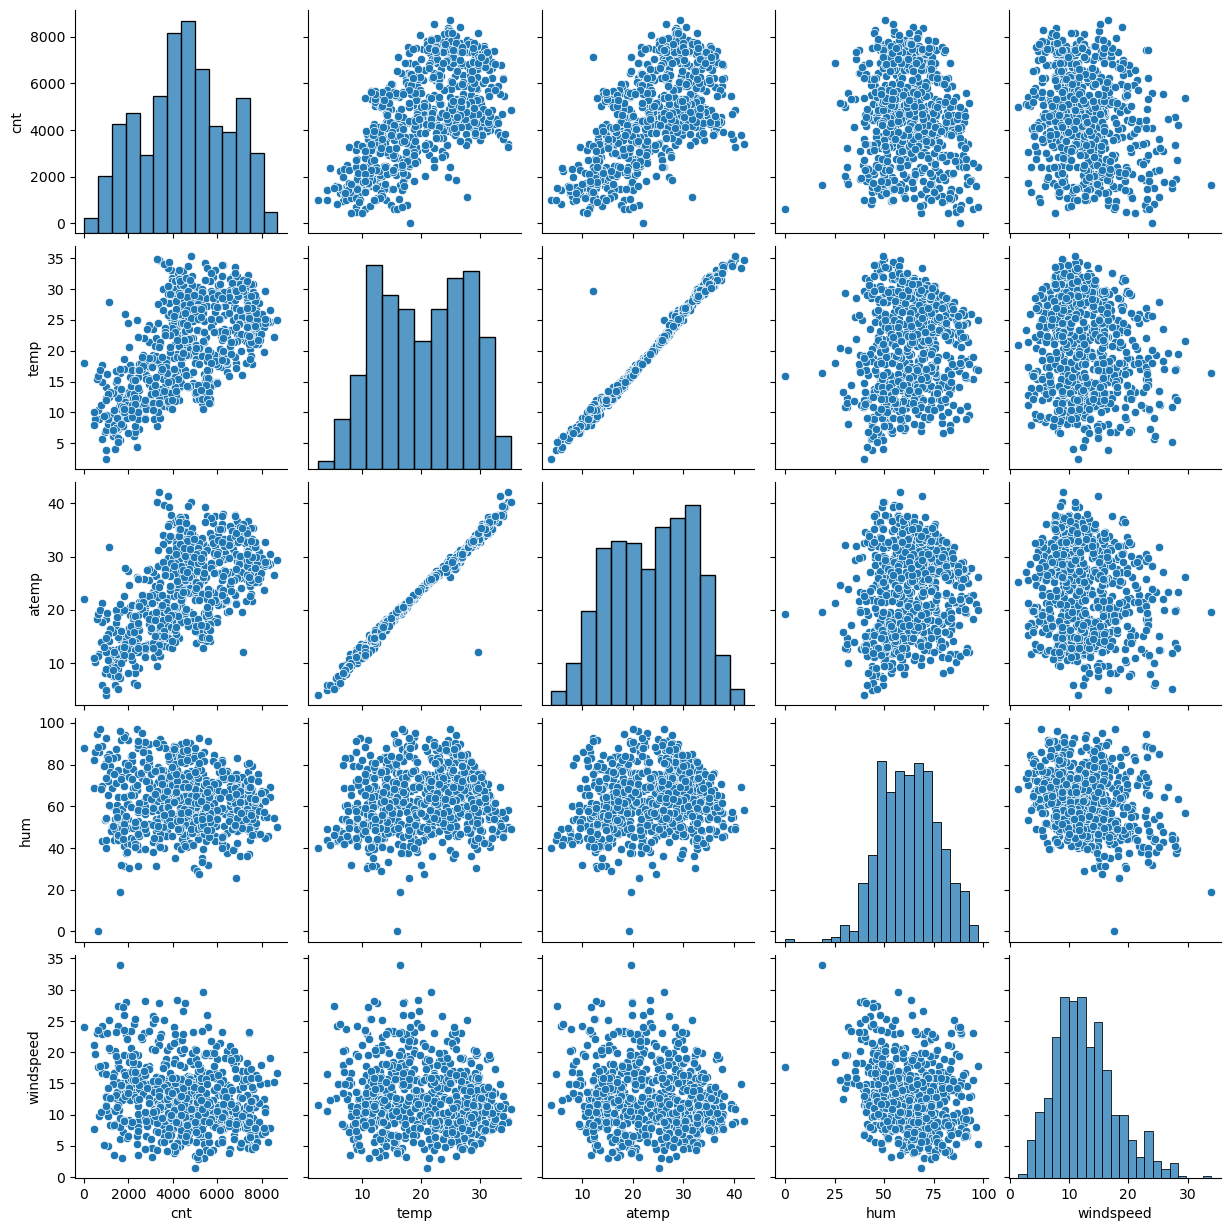

In [18]:
#Visualize pairplot excluding the categorical variable

df_num = df[['cnt','mnth', 'temp','atemp','hum','windspeed']]

sns.pairplot(df_num)
plt.show()

In [19]:
# We can see temp and atemp are similar variable. Let us drop one of this colume from DF

df.drop(['atemp'], axis = 1, inplace = True)

In [20]:
#As seen in the correlation matrix. The temp column has a good linear relation ship with the target variable

#### Visualising Categorical Variables
As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

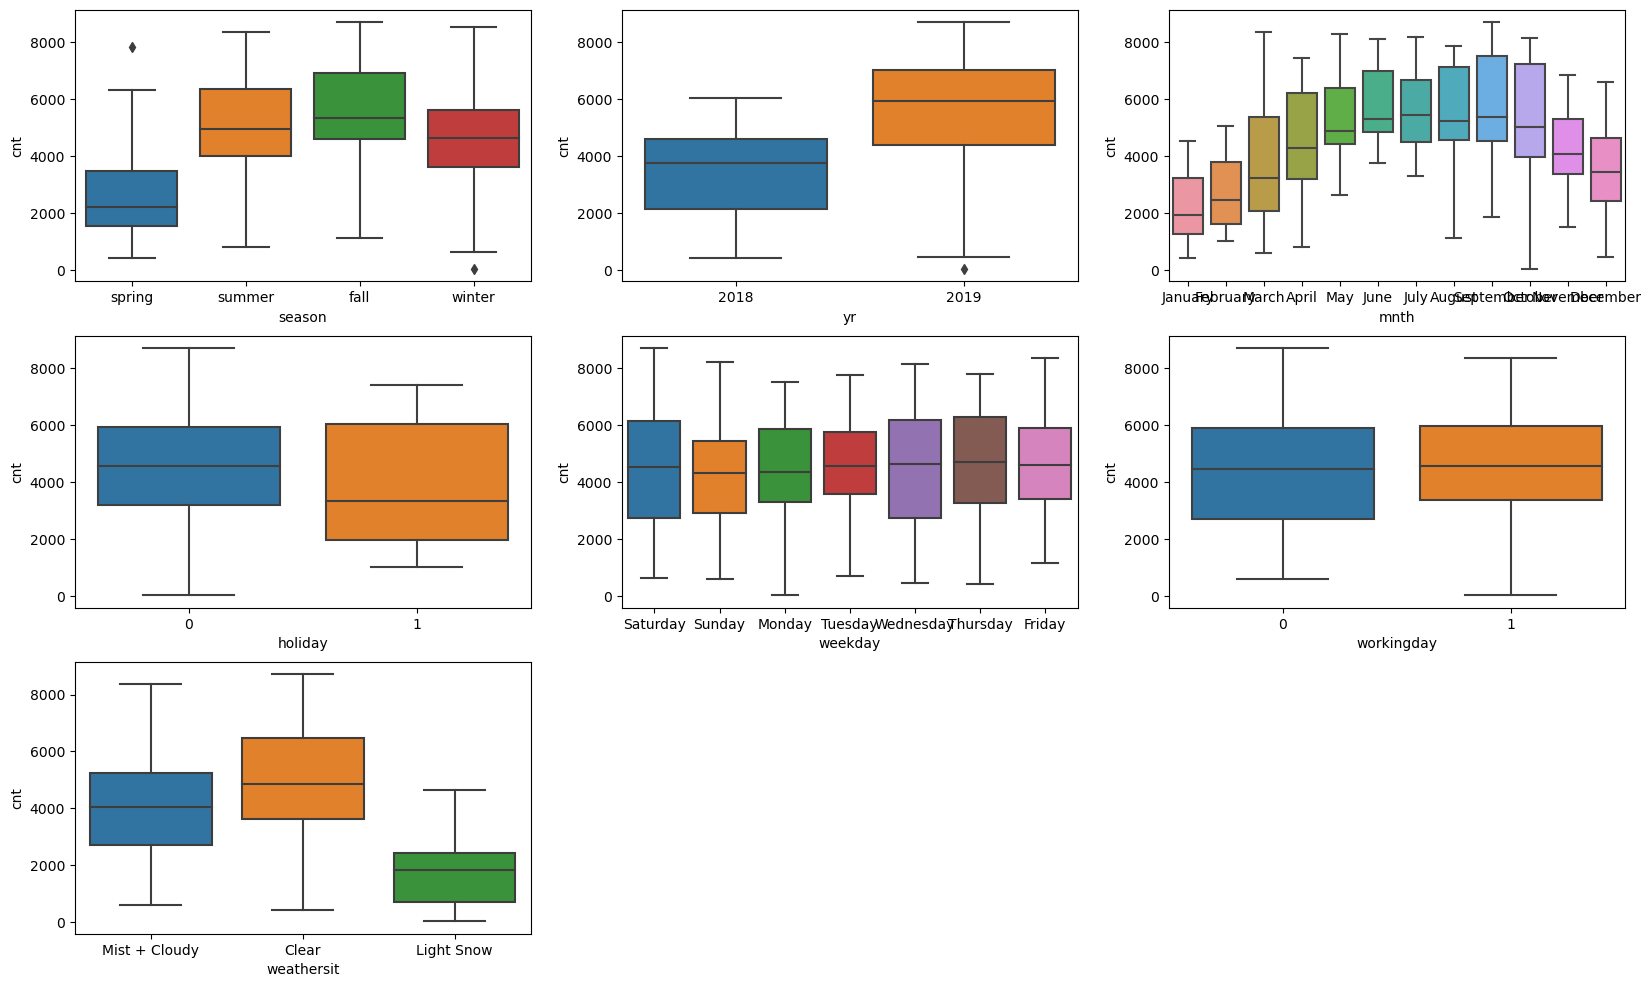

In [21]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

##### Observations

1. The weekday variable dont have much impact. The median is almost same for all days.
2. Year 2019 have more business compared to 2018.
3. Spring season have very less business
4. During May month to October month, the sales are comparitively higher
5. Working day, Holiday has not much impact in the Sales
6. Weather - IF "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds" less business

More impactful fields are Year, Month, Season, Weather


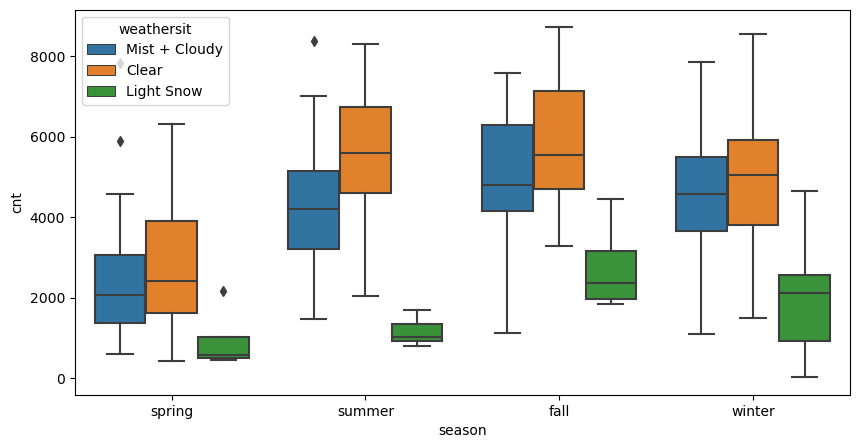

In [22]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'weathersit', data = df)
plt.show()

## Step 3: Data Preparation



In [26]:
#Based on the data visualization study, let us drop the columns weekday, workingday

df.drop(['weekday','workingday'], axis=1, inplace=True)

In [27]:
#Dummy Variables

df = pd.get_dummies(df, columns=['season', 'weathersit'], drop_first=True)

In [28]:
df.head()

,instant,dteday,yr,mnth,holiday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Light Snow,weathersit_Mist + Cloudy
0,1,01-01-2018,2018,January,0,14.110847,80.5833,10.749882,985,1,0,0,0,1
1,2,02-01-2018,2018,January,0,14.902598,69.6087,16.652113,801,1,0,0,0,1
2,3,03-01-2018,2018,January,0,8.050924,43.7273,16.636703,1349,1,0,0,0,0
3,4,04-01-2018,2018,January,0,8.200000,59.0435,10.739832,1562,1,0,0,0,0
4,5,05-01-2018,2018,January,0,9.305237,43.6957,12.522300,1600,1,0,0,0,0


In [29]:
df = pd.get_dummies(df, columns=['mnth','yr'], drop_first=True)

In [30]:
df.head()

,instant,dteday,holiday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,yr_2019
0,1,01-01-2018,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2,02-01-2018,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,03-01-2018,0,8.050924,43.7273,16.636703,1349,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,4,04-01-2018,0,8.200000,59.0435,10.739832,1562,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,5,05-01-2018,0,9.305237,43.6957,12.522300,1600,1,0,0,...,0,1,0,0,0,0,0,0,0,0


## Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [42]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [43]:
# Rescaling the continuous variable using MinMax scaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [44]:
# Apply scaler() to all the columns except the  'dummy' variables
num_vars = ['cnt','instant','temp','hum','windspeed']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [45]:
df_train.head()

,instant,dteday,holiday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,yr_2019
653,0.896978,16-10-2019,0,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,1,0,1
576,0.791209,31-07-2019,0,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,1,0,0,0,0,0,0,1
426,0.585165,03-03-2019,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1.000000,30-12-2019,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,0.662088,28-04-2019,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
y_train = df_train.pop('cnt')

In [52]:
X_train = df_train

In [47]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

## Step 5: Building a linear model

In [53]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [54]:
# Check the parameters obtained

lr.params

const    0.169798
temp     0.639952
dtype: float64

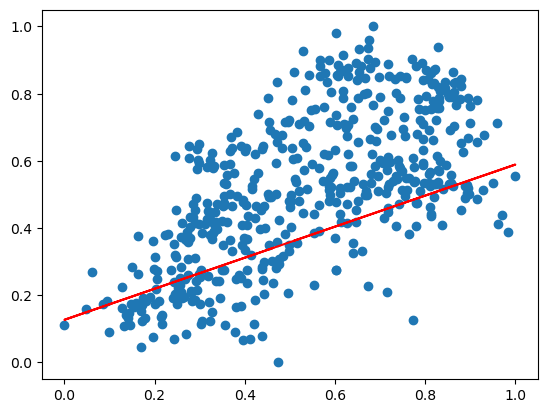

In [55]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.127 + 0.462*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [56]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           5.80e-61
Time:                        08:15:09   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

### Adding another variable

The R-squared value is 0.414, which can be further improved by adding more feature variables

In [61]:
X_train_lm = X_train[['temp','hum', 'instant','windspeed','holiday']]

In [62]:

X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const        0.297405
temp         0.523672
hum         -0.320339
instant      0.420654
windspeed   -0.208870
holiday     -0.094225
dtype: float64

In [63]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     308.0
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          1.16e-150
Time:                        08:26:38   Log-Likelihood:                 395.54
No. Observations:                 510   AIC:                            -779.1
Df Residuals:                     504   BIC:                            -753.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2974      0.031      9.681      0.0

In [64]:
#Still the R-squared value is good with 75% coverage

In [99]:
#Let us add year variable

X_train_lm = X_train[['temp', 'hum', 'windspeed','holiday','yr_2019','season_spring','season_summer','season_winter']]

In [100]:
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const            0.360834
temp             0.547101
hum             -0.314536
windspeed       -0.235132
holiday         -0.074425
yr_2019          0.230329
season_spring   -0.056608
season_summer    0.051998
season_winter    0.099514
dtype: float64

In [101]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     249.0
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          3.67e-169
Time:                        08:42:44   Log-Likelihood:                 447.70
No. Observations:                 510   AIC:                            -877.4
Df Residuals:                     501   BIC:                            -839.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3608      0.037      9.704

In [102]:
# I have to remove the instant variable as it reduce the F-statistics and increases the P value

We have significant R square value

A high F-statistic with a low p-value suggests that at least one predictor variable is significant in explaining the variance in the dependent variable. In our case, the F-statistic is 249.8, and the p-value is very close to zero, indicating that our model is statistically significant.

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [103]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [108]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,68.47
6,season_spring,4.49
1,temp,3.34
8,season_winter,3.05
7,season_summer,2.05
2,hum,1.15
3,windspeed,1.14
5,yr_2019,1.03
4,holiday,1.01


In [110]:
#Here the season_spring variable have very high VIF value ( > 5), let us drop and try the model

X_train_lm = X_train[['temp', 'hum', 'windspeed','holiday','yr_2019','season_summer','season_winter']]

X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     280.6
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          5.29e-169
Time:                        21:54:12   Log-Likelihood:                 444.41
No. Observations:                 510   AIC:                            -872.8
Df Residuals:                     502   BIC:                            -838.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2977      0.028     10.677

## Step 7: Residual Analysis of the train data

Check if the error terms are normally distributed

In [112]:
y_train_price = lr.predict(X_train_lm)

Text(0.5, 0, 'Errors')

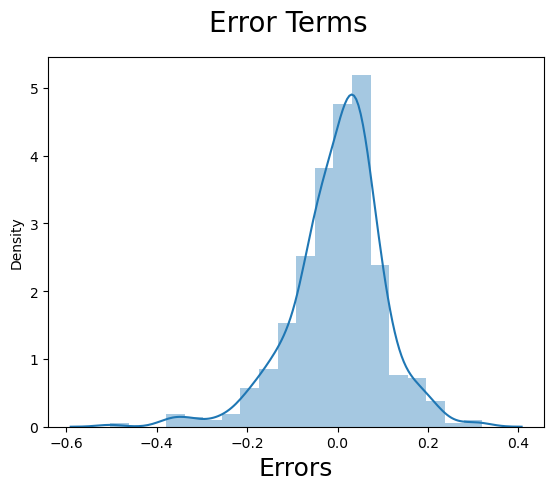

In [113]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Model Evaluation [Final Step]

In [129]:
# Calculate y_test and y_test_pred using x_test values -- Same step that we did for train data set

num_vars = ['cnt','instant','temp','hum','windspeed']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])



In [140]:
# Taking only the column while training the model i.e. x_train_lm
x_test = df_test[['temp', 'hum', 'windspeed','holiday','yr_2019','season_summer','season_winter']]
y_test = df_test.pop('cnt')



In [141]:
# Adding constant variable to test dataframe
X_test_1 = sm.add_constant(x_test)

In [143]:
y_pred = lr.predict(X_test_1)



Text(0, 0.5, 'y_pred')

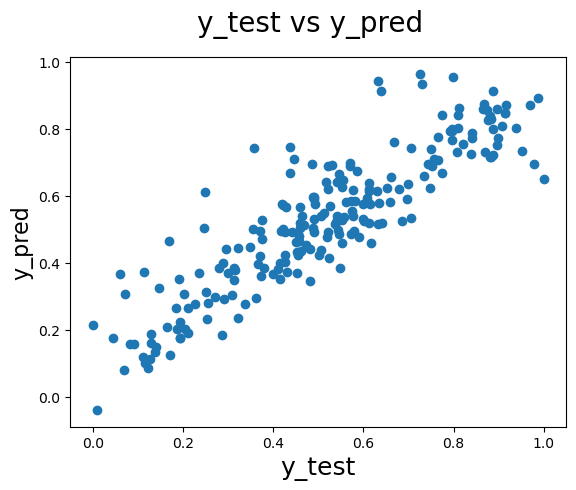

In [144]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [145]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
print (r_squared)

0.7768352584695386


#### The final R square value on the test dataset comes to 77.6 % and the training dataset comes to 79.6